In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import numpy as np

<h1>Abrir dataset com todas os pontos

In [2]:
df = pd.read_csv("./Dump 2018_04_30/gslocation.csv")
df

,session_id,seconds,millis,gpstime,gpsmillis,nsats,geo,lat,lon,alt,track,speed,climb,acc
0,16680,1053430,834,1519649539,152,-1,0101000020E610000034F8FBC56C4D21C02ACF728F5B52...,40.643419,-8.651221,0.000,0.0,0.0,NaN,142.500
1,16680,1053441,800,1519649549,235,-1,0101000020E6100000738AE99D654D21C07041B62C5F52...,40.643529,-8.651166,0.000,0.0,0.0,NaN,30.720
2,16680,1053453,680,1519649561,115,-1,0101000020E6100000C3459330784D21C07E8516235C52...,40.643437,-8.651308,0.000,0.0,0.0,NaN,21.990
3,16680,1053459,13,1519649566,448,-1,0101000020E610000061A6ED5F594D21C04B5C22725552...,40.643233,-8.651072,74.000,0.0,0.0,NaN,21.063
4,16680,1053468,845,1519649576,280,-1,0101000020E6100000843419445A4D21C0B07DB72F5652...,40.643255,-8.651079,74.000,0.0,0.0,NaN,19.376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581907,34844,216747,761,1525035732,451,-1,0101000020E610000022DC099BA64822C0E3B08FA9165B...,38.711629,-9.141896,117.071,292.0,1.1,NaN,18.401
12581908,34844,216753,772,1525035738,463,-1,0101000020E610000022DC099BA64822C0E3B08FA9165B...,38.711629,-9.141896,117.071,292.0,1.1,NaN,18.401
12581909,34844,216759,801,1525035744,491,-1,0101000020E610000022DC099BA64822C0E3B08FA9165B...,38.711629,-9.141896,117.071,292.0,1.1,NaN,18.401
12581910,34844,216765,893,1525035750,583,-1,0101000020E610000022DC099BA64822C0E3B08FA9165B...,38.711629,-9.141896,117.071,292.0,1.1,NaN,18.401


<h1>Fazer groupby por trip para saber o ponto medio a de cada trip

In [3]:
df_city = df.groupby("session_id").mean()
df_city

/var/folders/dm/tm_d3wvd3499slmwpnnjcd6m0000gn/T/ipykernel_33287/183383530.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df.groupby("session_id").mean()


,seconds,millis,gpstime,gpsmillis,nsats,lat,lon,alt,track,speed,climb,acc
session_id,,,,,,,,,,,,
16680,1.053499e+06,747.629630,1.519650e+09,11.031339,-1.0,40.643141,-8.650641,71.854701,99.646724,1.805983,NaN,24.031510
16681,1.052202e+06,403.755287,1.519648e+09,65.015106,-1.0,40.632691,-8.641564,76.450755,94.287009,6.264924,NaN,26.673335
16694,1.074422e+06,713.014925,1.519671e+09,32.223881,-1.0,40.643238,-8.651155,81.782090,17.686567,0.080896,NaN,59.219806
16751,8.482260e+04,231.780765,1.520274e+09,28.835574,-1.0,37.745811,-25.672780,67.953464,77.005171,3.603082,NaN,14.832196
16752,9.324482e+04,203.670201,1.520283e+09,49.392365,-1.0,37.745721,-25.665106,79.499470,129.926829,2.777084,NaN,11.443990
...,...,...,...,...,...,...,...,...,...,...,...,...
34837,1.706490e+05,475.949861,1.525040e+09,3.426184,-1.0,38.704257,-9.285645,25.334123,121.465181,7.193434,NaN,10.834838
34840,5.084853e+05,197.051661,1.525041e+09,74.867159,-1.0,38.775048,-9.101593,83.998411,229.206642,0.845204,NaN,11.903620
34842,5.603738e+05,327.364929,1.525042e+09,73.310427,-1.0,38.725024,-9.165897,142.081002,160.040284,0.356562,NaN,10.535590


<h1>Ver localizacao dos pontos

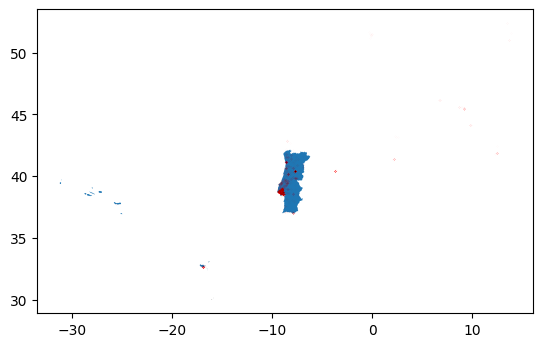

In [4]:
df1 = gpd.read_file("./gadm41_PRT_shp.zip")

df1.plot()
plt.scatter(df_city["lon"], df_city["lat"], color = "red", s = 0.0001)

,OBJECTID,COD_SIG,IDTIPO,COD_SIG_INE,PERIMETRO,AREA_M2,GlobalID,Shape__Area,Shape__Length,geometry
0,1,01,4001,None,49607.81,1.000543e+08,e4d30031-55fe-463a-a7e0-80c984a93c9e,1.646562e+08,63648.625748,"POLYGON ((-9.09571 38.79676, -9.09569 38.79676..."


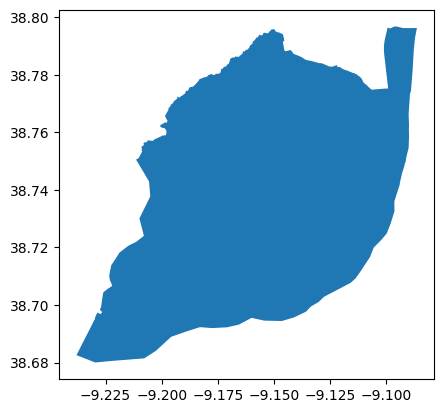

In [5]:
continente = gpd.read_file("./Limites_Cartografia.geojson")
#continente = continente[continente["NUTII_DSG"] == "Área Metropolitana de Lisboa"]
continente.plot()
display(continente)

<h1>Ver as trips que se encontram em Lisboa

In [6]:
print(len(df_city))
for ind1, row1 in continente.iterrows():
    points = 0
    for ind, row in df_city.iterrows():
        point = Point(row["lon"], row["lat"])
        shape = continente.at[ind1, "geometry"]

        if shape.contains(point):
            points += 1
        else:
            df_city = df_city.drop(ind)
    print(points)
print(len(df_city))

13133
8758
8758


In [7]:
df_city

,seconds,millis,gpstime,gpsmillis,nsats,lat,lon,alt,track,speed,climb,acc
session_id,,,,,,,,,,,,
16756,231503.160000,499.264000,1.520330e+09,485.544000,-1.0,38.737418,-9.140167,9.334056,0.000000,0.042593,NaN,21.154928
16762,158663.877358,202.614780,1.520362e+09,129.636792,-1.0,38.732411,-9.139518,65.132111,57.363208,0.401052,NaN,10.425107
16767,314256.081081,567.905405,1.520413e+09,218.256757,-1.0,38.737506,-9.139999,70.633361,89.533784,1.167133,NaN,15.196936
16768,237652.773913,490.034783,1.520336e+09,481.182609,-1.0,38.737177,-9.139917,159.400000,0.000000,0.000000,NaN,19.993904
16769,259172.023014,492.867112,1.520358e+09,1.453601,-1.0,38.752435,-9.159607,149.058668,233.925761,5.724365,NaN,10.221396
...,...,...,...,...,...,...,...,...,...,...,...,...
34835,786584.437736,184.146141,1.525038e+09,1.478902,-1.0,38.730550,-9.150650,106.902615,169.590315,14.590079,NaN,10.136162
34840,508485.273063,197.051661,1.525041e+09,74.867159,-1.0,38.775048,-9.101593,83.998411,229.206642,0.845204,NaN,11.903620
34842,560373.764218,327.364929,1.525042e+09,73.310427,-1.0,38.725024,-9.165897,142.081002,160.040284,0.356562,NaN,10.535590


<h1>Abrir dataset com todas as trips

In [8]:
trips = pd.read_csv("./Dump 2018_04_30/processed_segments.csv")
trips.pop("walking")
trips.pop("travelmode")
trips.pop("travelmodes_scores")
trips = trips.dropna()
trips

,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile
0,17289,0,1935313,1935313427,38.749204,-9.202669,1935313,1935313427,38.749204,-9.202669,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
1,17362,0,351017,351017975,38.736776,-9.138850,351017,351017975,38.736776,-9.138850,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
2,17371,0,259657,259657061,38.757970,-9.258569,259657,259657061,38.757970,-9.258569,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
3,17254,20,1627716,1627716965,38.745511,-9.139048,1627716,1627716965,38.745511,-9.139048,0.000000,f,"(0.51779699999999995,0.51779699999999995,0.517...","(0.144701,0.144701,0.144701,0.144701,0.144701,..."
4,17378,0,272653,272653455,38.704684,-9.255327,272743,272743520,38.704684,-9.255327,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021..."
414130,34843,19,227239,227239950,38.755386,-9.149606,227307,227307009,38.755397,-9.149640,4.192200,f,"(0.00403402,0.0122346,0.115624,0.2006209999999...","(0.0000157544,0.000829331,0.0137738,0.02099239..."
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999..."
414132,34843,21,227351,227351504,38.755411,-9.149649,227354,227354502,38.755411,-9.149646,0.297302,f,"(0.0779979,0.091626,0.13788,0.1553172,0.181473...","(0.00909449,0.012476472499999999,0.031988825,0..."


In [9]:
sessions = list(df_city.index)
trips = trips.loc[trips['session_id'].isin(sessions)]
trips

,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile
0,17289,0,1935313,1935313427,38.749204,-9.202669,1935313,1935313427,38.749204,-9.202669,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
1,17362,0,351017,351017975,38.736776,-9.138850,351017,351017975,38.736776,-9.138850,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
2,17371,0,259657,259657061,38.757970,-9.258569,259657,259657061,38.757970,-9.258569,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
3,17254,20,1627716,1627716965,38.745511,-9.139048,1627716,1627716965,38.745511,-9.139048,0.000000,f,"(0.51779699999999995,0.51779699999999995,0.517...","(0.144701,0.144701,0.144701,0.144701,0.144701,..."
6,17391,0,410594,410594080,38.766766,-9.097238,410594,410594080,38.766766,-9.097238,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021..."
414130,34843,19,227239,227239950,38.755386,-9.149606,227307,227307009,38.755397,-9.149640,4.192200,f,"(0.00403402,0.0122346,0.115624,0.2006209999999...","(0.0000157544,0.000829331,0.0137738,0.02099239..."
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999..."
414132,34843,21,227351,227351504,38.755411,-9.149649,227354,227354502,38.755411,-9.149646,0.297302,f,"(0.0779979,0.091626,0.13788,0.1553172,0.181473...","(0.00909449,0.012476472499999999,0.031988825,0..."


<h1>Adicionar o user às trips

In [10]:
users_session = pd.read_csv("./Dump 2018_04_30/session.csv")
dict = {}
for ind , row in users_session.iterrows():
    dict[row["session_id"]] = row["user_id"]

trips["user_id"] = trips["session_id"]
trips["user_id"] = trips["user_id"].map(dict)
trips

/var/folders/dm/tm_d3wvd3499slmwpnnjcd6m0000gn/T/ipykernel_33287/3417524697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips["user_id"] = trips["session_id"]
/var/folders/dm/tm_d3wvd3499slmwpnnjcd6m0000gn/T/ipykernel_33287/3417524697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips["user_id"] = trips["user_id"].map(dict)


,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile,user_id
0,17289,0,1935313,1935313427,38.749204,-9.202669,1935313,1935313427,38.749204,-9.202669,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",457
1,17362,0,351017,351017975,38.736776,-9.138850,351017,351017975,38.736776,-9.138850,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",374
2,17371,0,259657,259657061,38.757970,-9.258569,259657,259657061,38.757970,-9.258569,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",413
3,17254,20,1627716,1627716965,38.745511,-9.139048,1627716,1627716965,38.745511,-9.139048,0.000000,f,"(0.51779699999999995,0.51779699999999995,0.517...","(0.144701,0.144701,0.144701,0.144701,0.144701,...",441
6,17391,0,410594,410594080,38.766766,-9.097238,410594,410594080,38.766766,-9.097238,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021...",464
414130,34843,19,227239,227239950,38.755386,-9.149606,227307,227307009,38.755397,-9.149640,4.192200,f,"(0.00403402,0.0122346,0.115624,0.2006209999999...","(0.0000157544,0.000829331,0.0137738,0.02099239...",464
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999...",464
414132,34843,21,227351,227351504,38.755411,-9.149649,227354,227354502,38.755411,-9.149646,0.297302,f,"(0.0779979,0.091626,0.13788,0.1553172,0.181473...","(0.00909449,0.012476472499999999,0.031988825,0...",464


<h1>Adicionar o tipo de viagem às trips

In [11]:
travel_mode = pd.read_csv("./Dump 2018_04_30/processed_travelmode_profile.csv")
display(travel_mode)
dict = {}
for ind , row in travel_mode.iterrows():
    probs = [row["car"], row["bike"], row["bus"], row["metro"], row["foot"]] 
    if np.argmax(probs) == 0:
        dict[str(int(row["session_id"])) + "-" + str(int(row["segment_id"]))] = "car"
    elif np.argmax(probs) == 1:
        dict[str(int(row["session_id"])) + "-" + str(int(row["segment_id"]))] = "bike"
    elif np.argmax(probs) == 2:
        dict[str(int(row["session_id"])) + "-" + str(int(row["segment_id"]))] = "bus"
    elif np.argmax(probs) == 3:
        dict[str(int(row["session_id"])) + "-" + str(int(row["segment_id"]))] = "metro"
    elif np.argmax(probs) == 4:
        dict[str(int(row["session_id"])) + "-" + str(int(row["segment_id"]))] = "foot"


trips["travelmode"] = ""
for ind, row in trips.iterrows():
    trips.at[ind, "travelmode"] = str(row["session_id"]) + "-" + str(row["segment_id"])
display(trips)

trips["travelmode"] = trips["travelmode"].map(dict)
trips

,session_id,segment_id,car,bike,bus,metro,foot
0,17086,1,0.000,0.00,0.000,0.0,1.000
1,17086,3,0.725,0.05,0.125,0.1,0.000
2,17086,5,0.000,0.00,0.000,0.0,1.000
3,17086,7,0.000,0.00,0.000,0.0,1.000
4,17086,9,0.625,0.00,0.350,0.0,0.025
...,...,...,...,...,...,...,...
203560,34843,14,0.000,0.00,0.000,0.0,1.000
203561,34843,16,0.000,0.00,0.000,0.0,1.000
203562,34843,18,0.000,0.00,0.000,0.0,1.000
203563,34843,20,0.000,0.00,0.000,0.0,1.000


/var/folders/dm/tm_d3wvd3499slmwpnnjcd6m0000gn/T/ipykernel_33287/887432048.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips["travelmode"] = ""


,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile,user_id,travelmode
0,17289,0,1935313,1935313427,38.749204,-9.202669,1935313,1935313427,38.749204,-9.202669,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",457,17289-0
1,17362,0,351017,351017975,38.736776,-9.138850,351017,351017975,38.736776,-9.138850,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",374,17362-0
2,17371,0,259657,259657061,38.757970,-9.258569,259657,259657061,38.757970,-9.258569,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",413,17371-0
3,17254,20,1627716,1627716965,38.745511,-9.139048,1627716,1627716965,38.745511,-9.139048,0.000000,f,"(0.51779699999999995,0.51779699999999995,0.517...","(0.144701,0.144701,0.144701,0.144701,0.144701,...",441,17254-20
6,17391,0,410594,410594080,38.766766,-9.097238,410594,410594080,38.766766,-9.097238,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",462,17391-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021...",464,34843-18
414130,34843,19,227239,227239950,38.755386,-9.149606,227307,227307009,38.755397,-9.149640,4.192200,f,"(0.00403402,0.0122346,0.115624,0.2006209999999...","(0.0000157544,0.000829331,0.0137738,0.02099239...",464,34843-19
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999...",464,34843-20
414132,34843,21,227351,227351504,38.755411,-9.149649,227354,227354502,38.755411,-9.149646,0.297302,f,"(0.0779979,0.091626,0.13788,0.1553172,0.181473...","(0.00909449,0.012476472499999999,0.031988825,0...",464,34843-21


/var/folders/dm/tm_d3wvd3499slmwpnnjcd6m0000gn/T/ipykernel_33287/887432048.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips["travelmode"] = trips["travelmode"].map(dict)


,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile,user_id,travelmode
0,17289,0,1935313,1935313427,38.749204,-9.202669,1935313,1935313427,38.749204,-9.202669,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",457,NaN
1,17362,0,351017,351017975,38.736776,-9.138850,351017,351017975,38.736776,-9.138850,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",374,NaN
2,17371,0,259657,259657061,38.757970,-9.258569,259657,259657061,38.757970,-9.258569,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",413,NaN
3,17254,20,1627716,1627716965,38.745511,-9.139048,1627716,1627716965,38.745511,-9.139048,0.000000,f,"(0.51779699999999995,0.51779699999999995,0.517...","(0.144701,0.144701,0.144701,0.144701,0.144701,...",441,NaN
6,17391,0,410594,410594080,38.766766,-9.097238,410594,410594080,38.766766,-9.097238,0.000000,f,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-...",462,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021...",464,foot
414130,34843,19,227239,227239950,38.755386,-9.149606,227307,227307009,38.755397,-9.149640,4.192200,f,"(0.00403402,0.0122346,0.115624,0.2006209999999...","(0.0000157544,0.000829331,0.0137738,0.02099239...",464,NaN
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999...",464,foot
414132,34843,21,227351,227351504,38.755411,-9.149649,227354,227354502,38.755411,-9.149646,0.297302,f,"(0.0779979,0.091626,0.13788,0.1553172,0.181473...","(0.00909449,0.012476472499999999,0.031988825,0...",464,NaN


In [12]:
trips = trips.dropna()
trips.to_csv("./Trips.csv")
trips

,session_id,segment_id,seconds_start,secmillis_start,lat_start,lon_start,seconds_end,secmillis_end,lat_end,lon_end,length,movement,speed_profile,acceleration_profile,user_id,travelmode
8,16756,1,231321,231321114,38.737797,-9.140219,231326,231326150,38.737673,-9.140348,17.753900,t,"(3.5256500000000002,3.9484699999999999,4.79410...","(0.0,0.042265249999999997,0.12679574999999998,...",332,car
10,16756,3,231336,231336181,38.737610,-9.140368,231346,231346216,38.737585,-9.140239,13.015600,t,"(0.53366400000000003,0.79111500000000001,1.222...","(0.017746100000000001,0.078773200000000002,0.6...",332,foot
12,16756,5,231377,231377275,38.737358,-9.140099,231437,231437916,38.737357,-9.140075,66.780500,t,"(0.59673900000000002,0.66969875000000001,1.389...","(0.0017589400000000001,0.026259625000000002,0....",332,foot
14,16756,7,231458,231458139,38.737397,-9.140146,231458,231458139,38.737397,-9.140146,0.000000,t,"(0.80858699999999994,0.80858699999999994,0.808...","(0.046352400000000002,0.046352400000000002,0.0...",332,foot
16,16756,9,231508,231508764,38.737350,-9.140189,231524,231524522,38.737383,-9.140189,9.863710,t,"(0.54686699999999999,0.54717599999999988,0.750...","(0.0187511,0.021935974999999996,0.026632474999...",332,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414125,34843,14,227014,227014650,38.755377,-9.149506,227021,227021358,38.755397,-9.149588,7.417500,t,"(0.700968,0.8021885,1.0046295,1.0451177,1.1058...","(0.0343497,0.03627565,0.04012755,0.04089793,0....",464,foot
414127,34843,16,227051,227051966,38.755380,-9.149578,227062,227062107,38.755413,-9.149469,10.100500,t,"(0.687937,0.760232,1.0669485,1.160717099999999...","(0.0460823,0.0532862,0.06278105,0.06369743,0.0...",464,foot
414129,34843,18,227224,227224746,38.755400,-9.149508,227234,227234984,38.755381,-9.149585,6.977600,t,"(0.538003,0.576768,0.683214,0.7102864,0.750895...","(0.0132216,0.0132637,0.017164,0.01870728,0.021...",464,foot
414131,34843,20,227313,227313512,38.755205,-9.149999,227350,227350501,38.755411,-9.149651,81.064600,t,"(0.263354,0.797014,2.3214224999999997,3.543258...","(0.00668029,0.10699175,0.52616175,1.4649374999...",464,foot
